# Multiple Linear Regression

In [1]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Make the notebook reproducible.
seed = 42
random.seed(seed)
np.random.seed(seed=seed)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#@title Dataset generation (keep hidden until later)

X, y, coef = make_regression(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    noise=30.0, 
    bias=50.0, 
    shuffle=True, 
    coef=True, 
    random_state=seed)

Our model: 

$y \sim \mathcal{N}(\beta_0 + \beta_1 x_1 + \beta_2 x_2, \ \sigma)$

In [3]:
X[0:5]

array([[-1.1913035 ,  0.65655361],
       [ 0.05820872, -1.1429703 ],
       [ 0.58685709,  2.19045563],
       [ 0.47323762, -0.07282891],
       [ 0.73846658,  0.17136828]])

In [4]:
y[0:5]

array([ 13.97759026, -46.36600776, 256.17429519,  65.33836969,
       148.07329937])

Show our dataset in a 3D scatterplot.

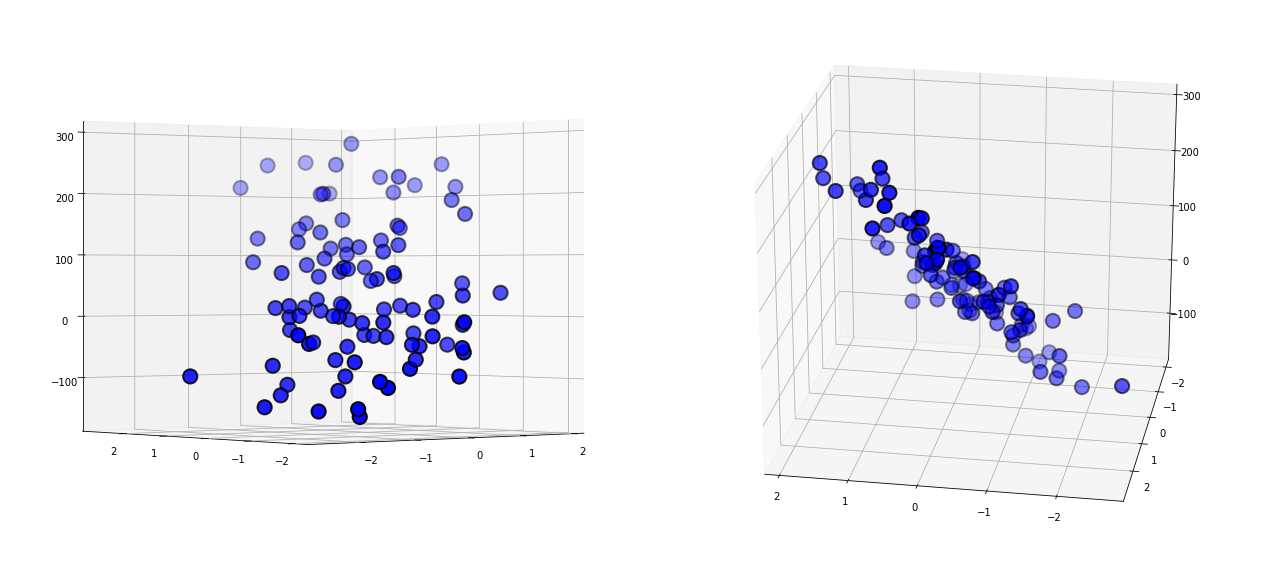

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), subplot_kw={'projection': '3d'})

axes[0].scatter(X[:, 0], X[:, 1], y, s=200, c='b', linewidth=2, edgecolor='k')
axes[1].scatter(X[:, 0], X[:, 1], y, s=200, c='b', linewidth=2, edgecolor='k')

axes[0].view_init(elev=0, azim=-130)
axes[1].view_init(elev=25, azim=100)

plt.tight_layout()
plt.show()

Creating our multiple linear regression (MLR) model: 

$\hat \beta = (X^TX)^{-1}X^Ty$

In [6]:
class LinearRegression():

  def __init__(self, fit_intercept=True):
    self.fit_intercept = fit_intercept

  def fit(self, X, y):
    if self.fit_intercept:
      X = self._add_bias_column(X)
    self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

  def predict(self, X):
    if self.fit_intercept:
      X = self._add_bias_column(X)
    y_pred = X @ self.beta
    return y_pred
  
  def _add_bias_column(self, X):
    num_samples = X.shape[0]
    bias_col = np.ones((num_samples, 1))
    X = np.hstack((bias_col, X))
    return X

In [7]:
lr = LinearRegression()
lr.fit(X, y)

In [8]:
for i, b in enumerate(lr.beta):
  print("b%d: %.3f" % (i, b))

b0: 50.649
b1: 82.533
b2: 74.197


In [9]:
y_pred = lr.predict(X)

r2 = metrics.r2_score(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)

print("R^2: %.2f, MSE: %.2f" % (r2, mse))

R^2: 0.91, MSE: 1035.12


Plot the plane of best fit.

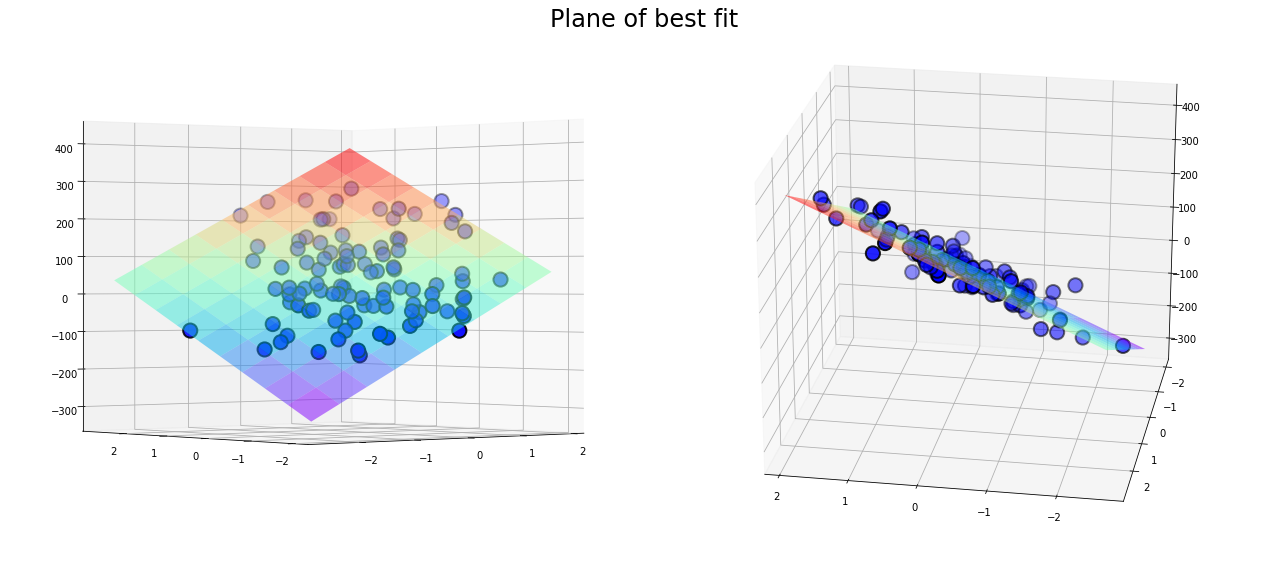

In [10]:
b0, b1, b2 = lr.beta

xx1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
xx2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
xx1, xx2 = np.meshgrid(xx1, xx2)
yy = b0 + b1 * xx1 + b2 * xx2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), subplot_kw={'projection': '3d'})
fig.suptitle("Plane of best fit", size=24)

axes[0].scatter(X[:, 0], X[:, 1], y, s=200, c='b', linewidth=2, edgecolor='k')
axes[1].scatter(X[:, 0], X[:, 1], y, s=200, c='b', linewidth=2, edgecolor='k')

axes[0].view_init(elev=0, azim=-130)
axes[1].view_init(elev=25, azim=100)

axes[0].plot_surface(xx1, xx2, yy, alpha=0.5, cmap='rainbow')
axes[1].plot_surface(xx1, xx2, yy, alpha=0.5, cmap='rainbow')

plt.tight_layout()
plt.show()

In [11]:
#@title Dataset generation (keep hidden until later)

X, y, coef = make_regression(
    n_samples=100, 
    n_features=1, 
    n_informative=1, 
    noise=30.0, 
    bias=25.0, 
    shuffle=True, 
    coef=True, 
    random_state=seed)

dummy = np.random.choice([0.0, 1.0], size=(100, 1))
X = np.hstack((X, dummy))

y[dummy.squeeze() == 1.0] += 100

MLR with categorical variables: 

$y \sim \mathcal{N}(\beta_0 + \beta_1 x_1 + \beta_2 d, \ \sigma)$ 

In [12]:
X[0:5]

array([[ 0.93128012,  0.        ],
       [ 0.08704707,  1.        ],
       [-1.05771093,  0.        ],
       [ 0.31424733,  0.        ],
       [-0.47917424,  0.        ]])

In [13]:
y[0:5]

array([99.59447456, 87.53730871,  8.54486026, 30.34617009, 11.78738815])

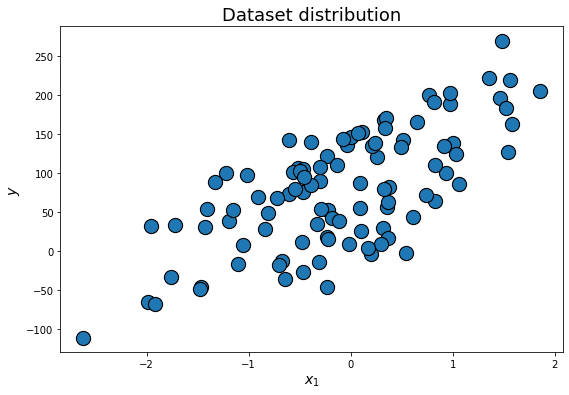

In [14]:
plt.figure(figsize=(9, 6))

sns.scatterplot(x=X[:, 0], y=y, s=200, edgecolor='k')

plt.title("Dataset distribution", size=18)
plt.xlabel("$x_1$", size=14)
plt.ylabel("$y$", size=14)

plt.show()

In [15]:
lr = LinearRegression()
lr.fit(X, y)

In [16]:
for i, b in enumerate(lr.beta):
  print("b%d: %.3f" % (i, b))

b0: 31.114
b1: 50.121
b2: 95.379


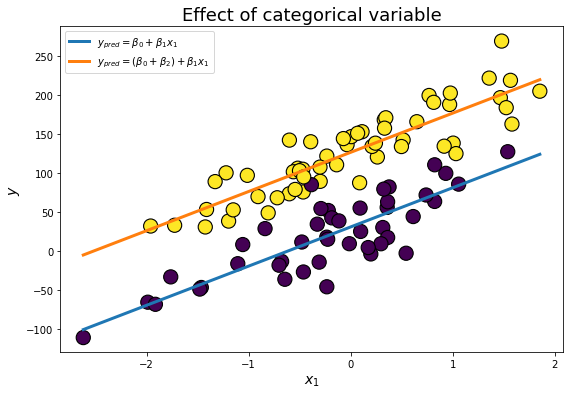

In [17]:
plt.figure(figsize=(9, 6))

x1_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

b0, b1, b2 = lr.beta

y_pred_0 = b0 + b1 * x1_line
y_pred_1 = (b0 + b2) + b1 * x1_line

sns.scatterplot(x=X[:, 0], y=y, c=X[:, 1], s=200, edgecolor='k')
sns.lineplot(x=x1_line, y=y_pred_0, linewidth=3, label=r"$y_{pred} = \beta_0 + \beta_1 x_1$")
sns.lineplot(x=x1_line, y=y_pred_1, linewidth=3, label=r"$y_{pred} = (\beta_0 + \beta_2) + \beta_1 x_1$")

plt.title("Effect of categorical variable", size=18)
plt.xlabel("$x_1$", size=14)
plt.ylabel("$y$", size=14)

plt.show()

Feature ranking and standardization.

In [18]:
#@title Dataset generation (keep hidden until later)

X, y, coef = make_regression(
    n_samples=100, 
    n_features=4, 
    n_informative=4, 
    noise=30.0, 
    bias=30.0, 
    shuffle=True, 
    coef=True, 
    random_state=seed)

x_mu = np.array([100.0, 10.0, 1.0, 0.1])
x_sigma = np.array([50, 3.2, 0.4, 0.025])
X = X * x_sigma + x_mu

df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4'])
df['y'] = y

MLR model with 4 numerical variables: 

$y \sim \mathcal{N}(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4,\ \sigma)$ 

In [19]:
X[0:2]

array([[1.42621667e+02, 7.88228331e+00, 1.07458173e+00, 4.93714353e-02],
       [7.53499533e+01, 9.33400880e+00, 7.50920192e-01, 1.07024797e-01]])

In [20]:
y[0:2]

array([22.12979921, 30.17588334])

In [21]:
df.head()

,x1,x2,x3,x4,y
0,142.621667,7.882283,1.074582,0.049371,22.129799
1,75.349953,9.334009,0.750920,0.107025,30.175883
2,42.851485,10.186268,1.061490,0.077904,-72.313952
3,118.784901,6.316821,1.044369,0.086390,40.058179
4,40.189669,6.459728,0.925736,0.088021,-101.158572


Show the correlations between variables.

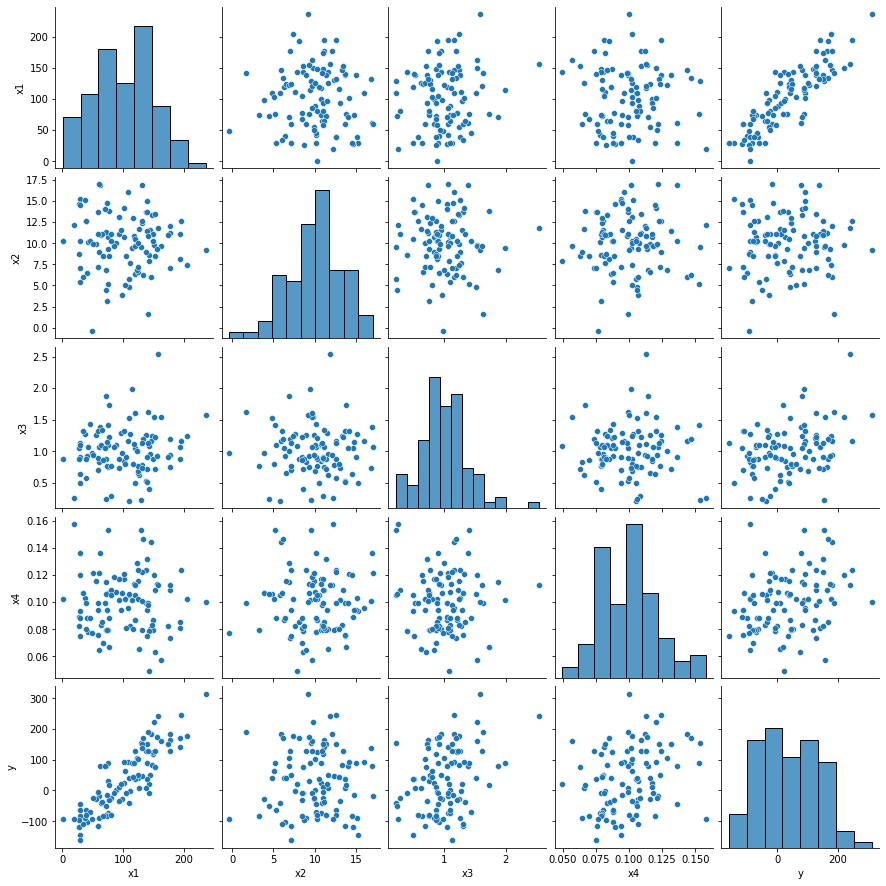

In [22]:
sns.pairplot(df)

Create our model and rank the features by importance.

In [23]:
lr = LinearRegression()
lr.fit(X, y)

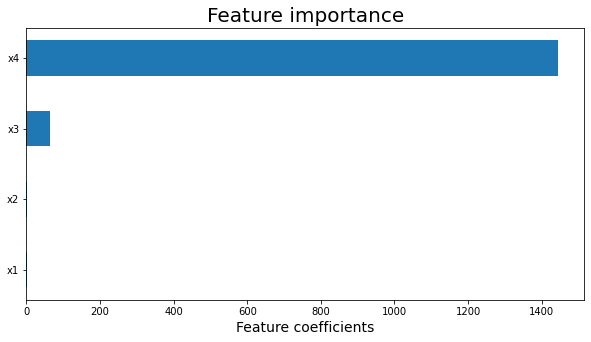

In [24]:
plt.figure(figsize=(10, 5))

plt.barh(['x1', 'x2', 'x3', 'x4'], width=lr.beta[1:], height=0.5)

plt.title("Feature importance", size=20)
plt.xlabel("Feature coefficients", size=14)

plt.show()

In [25]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

In [26]:
for i in range(4):
  print("x%d: mean %.2f, std %.2f" % (i+1, X_mean[i], X_std[i]))

x1: mean 102.19, std 48.87
x2: mean 10.07, std 3.32
x3: mean 1.01, std 0.38
x4: mean 0.10, std 0.02


In [27]:
X_standardized = (X - X_mean) / X_std

In [28]:
X_standardized_mean = X_standardized.mean(axis=0)
X_standardized_std = X_standardized.std(axis=0)

In [29]:
for i in range(4):
  print("x%d: mean %.2f, std %.2f" % (i+1, X_standardized_mean[i], X_standardized_std[i]))

x1: mean 0.00, std 1.00
x2: mean 0.00, std 1.00
x3: mean 0.00, std 1.00
x4: mean -0.00, std 1.00


In [30]:
lr = LinearRegression()
lr.fit(X_standardized, y)

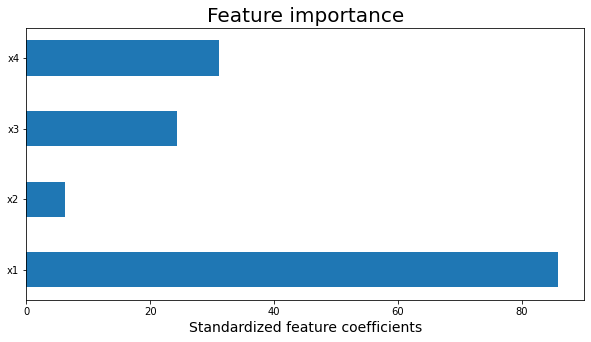

In [31]:
plt.figure(figsize=(10, 5))

plt.barh(['x1', 'x2', 'x3', 'x4'], width=lr.beta[1:], height=0.5)

plt.title("Feature importance", size=20)
plt.xlabel("Standardized feature coefficients", size=14)

plt.show()

Diagnosing multicollinearity in our MLR models

In [32]:
#@title Dataset generation (keep hidden until later)

X, y, coef = make_regression(
    n_samples=1000, 
    n_features=2, 
    n_informative=2, 
    noise=20.0, 
    bias=50.0, 
    shuffle=True, 
    coef=True, 
    random_state=seed)

x3 = X[:, 0] + X[:, 1] + np.random.normal(0, 0.05, (1000,))
X = np.hstack((X, x3[..., np.newaxis]))

df = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
df['y'] = y

MLR model with 4 numerical variables: 

$y \sim \mathcal{N}(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3,\ \sigma)$
<br><br>
$x_3$ presents multicollinearity of the form:

$x_{3i} = \alpha_0 + \alpha_1 x_{1i} + \alpha_2 x_{2i} + \delta_i$

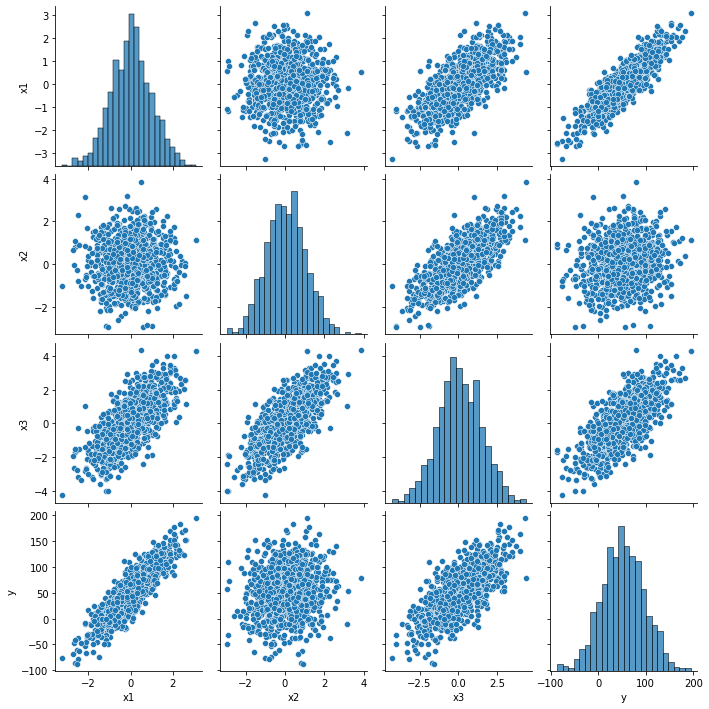

In [33]:
sns.pairplot(df)

Compute the $\beta$ parameters for 10 subsets of our data separately.

In [34]:
indices = [i for i in range(len(X))]
random.shuffle(indices)
split = len(indices) // 10

betas = []
for i in range(0, len(indices), split):
  idx = indices[i: i + split]
  X_split = X[idx]
  y_split = y[idx]

  lr = LinearRegression()
  lr.fit(X_split, y_split)
  betas.append(lr.beta)

betas = np.array(betas)

In [35]:
betas = pd.DataFrame(betas, columns=[f'b{i}' for i in range(betas.shape[1])])

In [36]:
betas.head()

,b0,b1,b2,b3
0,52.170075,63.314791,26.353773,-21.452298
1,45.514316,-26.621820,-58.533082,67.253097
2,52.636699,110.490364,77.400327,-71.826029
3,50.341983,42.305190,7.983851,1.787058
4,54.782385,37.082998,3.070470,4.161900


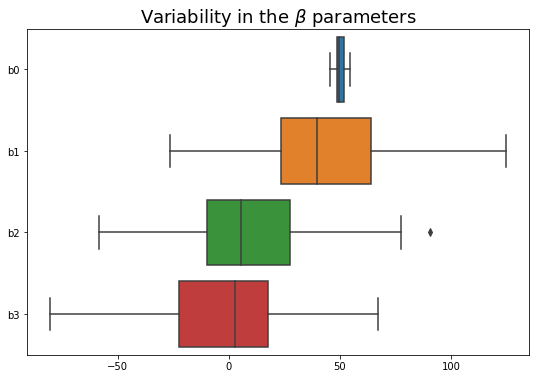

In [37]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=betas, orient='h')

plt.title(r"Variability in the $\beta$ parameters", size=18)

plt.show()

In [38]:
X_vif = add_constant(X)

In [39]:
vif_vals = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
vif_vals = pd.Series(vif_vals, name='VIF values', index=['const', 'x1', 'x2', 'x3'])
vif_vals.sort_values(ascending=False, inplace=True)

In [40]:
vif_vals

x3       818.379959
x2       430.488147
x1       386.788058
const      1.006091
Name: VIF values, dtype: float64

Treating multicollinearity in our MLR models

In [41]:
X_vif = X_vif[:, :-1]

In [42]:
vif_vals = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
vif_vals = pd.Series(vif_vals, name='VIF values', index=['const', 'x1', 'x2'])
vif_vals.sort_values(ascending=False, inplace=True)

In [43]:
vif_vals

const    1.004337
x1       1.000007
x2       1.000007
Name: VIF values, dtype: float64

Compute the $\beta$ parameters for 10 subsets of our data separately.

In [44]:
indices = [i for i in range(len(X))]
random.shuffle(indices)
split = len(indices) // 10

betas = []
for i in range(0, len(indices), split):
  idx = indices[i: i + split]
  X_split = X[idx, :-1]
  y_split = y[idx]

  lr = LinearRegression()
  lr.fit(X_split, y_split)
  betas.append(lr.beta)

betas = np.array(betas)

In [45]:
betas = pd.DataFrame(betas, columns=[f'b{i}' for i in range(betas.shape[1])])

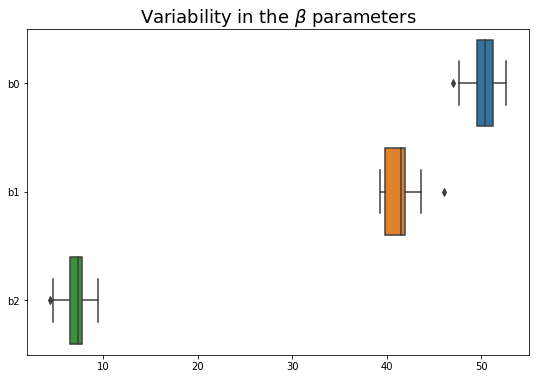

In [46]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=betas, orient='h')

plt.title(r"Variability in the $\beta$ parameters", size=18)

plt.show()